<a href="https://colab.research.google.com/github/tendomart/codingdojo/blob/main/Core_Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset 1:

DATASET SOURCE : 
https://catalog.data.gov/dataset/alcohol-related-disease-impact-ardi-application-alcohol-attributable-fractions


2) Brief description of the data

 Alcohol-Related Disease Impact (ARDI) Application - Alcohol-Attributable Fractions


ARDI is an online application that provides national and state estimates of alcohol-related health impacts, including deaths and years of potential life lost (YPLL). These estimates are calculated for 58 acute and chronic causes using alcohol-attributable fractions, and are reported by age and sex for 2015-2019. This dataset provides estimates of the proportion of deaths from various causes that are attributable to alcohol.

FURTHER READING : https://pubmed.ncbi.nlm.nih.gov/1652146/



In [232]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [233]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
  

In [265]:
# import dataset

df = pd.read_csv('/content/sample_data/Alcohol-Related_Disease_Impact__ARDI__Application_-_Alcohol-Attributable_Fractions.csv')
# https://catalog.data.gov/dataset/alcohol-related-disease-impact-ardi-application-alcohol-attributable-fractions
df.head()

,Associated_AAD_YPLL_Years,LocationAbbr,LocationDesc,DataSource,Data_Value_Unit,ConditionType,Category,Cause_of_Death,Direct_AAF,Direct_AAF_Alt,...,Sex,AgeGroup,LocationID,ConditionTypeID,CategoryID,Cause_of_Death_ID,ConsumptionID,SexID,AgeGroupID,DataValueUnitID
0,2015-2019,WY,Wyoming,ARDI,Alcohol-Attributable Fractions,Acute,Other Acute Causes,Drowning,0.34,0.34,...,Female,Overall,56,ACUTE,CAT9,DROWNI,ANYALC,GENF,Age0,5YEARSAVG
1,2015-2019,WY,Wyoming,ARDI,Alcohol-Attributable Fractions,Acute,Other Acute Causes,Drowning,0.34,0.34,...,Male,Overall,56,ACUTE,CAT9,DROWNI,ANYALC,GENM,Age0,5YEARSAVG
2,2015-2019,WY,Wyoming,ARDI,Alcohol-Attributable Fractions,Acute,Other Acute Causes,Fall injuries,0.32,0.32,...,Female,Overall,56,ACUTE,CAT9,FALLIN,ANYALC,GENF,Age0,5YEARSAVG
3,2015-2019,WY,Wyoming,ARDI,Alcohol-Attributable Fractions,Acute,Other Acute Causes,Fall injuries,0.32,0.32,...,Male,Overall,56,ACUTE,CAT9,FALLIN,ANYALC,GENM,Age0,5YEARSAVG
4,2015-2019,WY,Wyoming,ARDI,Alcohol-Attributable Fractions,Acute,Other Acute Causes,Fire injuries,0.42,0.42,...,Female,Overall,56,ACUTE,CAT9,FIREIN,ANYALC,GENF,Age0,5YEARSAVG


In [235]:
# Count number of Rows and columns
df.shape

(13728, 29)

In [236]:
# Let's have a general look at the data
df.describe() 

,Direct_AAF,Direct_AAF_Alt,Indirect_AAF_Low_Alt,Indirect_AAF_Medium_Alt,Indirect_AAF_High_Alt,LocationID
count,8736.000000,8736.000000,2392.000000,4784.000000,4784.000000,13728.000000
mean,0.562058,0.562058,0.018123,0.018286,0.052962,30.307692
std,0.349268,0.349268,0.047639,0.021777,0.061780,18.264268
min,0.000000,0.000000,-0.160000,-0.050000,-0.080000,1.000000
25%,0.230000,0.230000,0.000000,0.000000,0.020000,16.750000
50%,0.420000,0.420000,0.010000,0.010000,0.030000,29.500000
75%,1.000000,1.000000,0.050000,0.030000,0.070000,42.500000
max,1.000000,1.000000,0.160000,0.140000,0.350000,99.000000


In [ ]:
# What is the target?
# The target is Cause_of_Death


In [237]:
# 4) Is this a classification or regression problem?
# This is a Classification problem (Using Nominal categorical features)
df.isna().sum()

Associated_AAD_YPLL_Years         0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Data_Value_Unit                   0
ConditionType                     0
Category                          0
Cause_of_Death                    0
Direct_AAF                     4992
Direct_AAF_Alt                 4992
Indirect_AAF_Low              11128
Indirect_AAF_Low_Alt          11336
Indirect_AAF_Medium            8736
Indirect_AAF_Medium_Alt        8944
Indirect_AAF_High              8736
Indirect_AAF_High_Alt          8944
Data_Value_Footnote_Symbol    12272
Data_Value_Footnote           12272
ConsumptionPattern                0
Sex                               0
AgeGroup                          0
LocationID                        0
ConditionTypeID                   0
CategoryID                        0
Cause_of_Death_ID                 0
ConsumptionID                     0
SexID                             0
AgeGroupID                  

In [238]:
# 5) How many features?
df.shape

# There are 29 features

(13728, 29)

In [ ]:
# 6) How many rows of data.

# There are 13728 rows

In [ ]:
#  7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset ?

# I foresee less accurate predictions in model predictions due to  alot of missing data

In [ ]:
# Find null or missing values

df.isnull().sum()

# We will drop the following columns since they contain thousands of missing values

# Direct_AAF                    1584
# Direct_AAF_Alt                1584
# Indirect_AAF_Low              3576
# Indirect_AAF_Low_Alt          3642
# Indirect_AAF_Medium           2794
# Indirect_AAF_Medium_Alt       2860
# Indirect_AAF_High             2794
# Indirect_AAF_High_Alt         2860
# Data_Value_Footnote_Symbol    3916
# Data_Value_Footnote           3916

Associated_AAD_YPLL_Years         0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Data_Value_Unit                   0
ConditionType                     0
Category                          0
Cause_of_Death                    0
Direct_AAF                     4992
Direct_AAF_Alt                 4992
Indirect_AAF_Low              11128
Indirect_AAF_Low_Alt          11336
Indirect_AAF_Medium            8736
Indirect_AAF_Medium_Alt        8944
Indirect_AAF_High              8736
Indirect_AAF_High_Alt          8944
Data_Value_Footnote_Symbol    12272
Data_Value_Footnote           12272
ConsumptionPattern                0
Sex                               0
AgeGroup                          0
LocationID                        0
ConditionTypeID                   0
CategoryID                        0
Cause_of_Death_ID                 0
ConsumptionID                     0
SexID                             0
AgeGroupID                  

In [117]:
# Let's see the datatypes
df.dtypes

Associated_AAD_YPLL_Years      object
LocationAbbr                   object
LocationDesc                   object
DataSource                     object
Data_Value_Unit                object
ConditionType                  object
Category                       object
Cause_of_Death                 object
Direct_AAF                    float64
Direct_AAF_Alt                float64
Indirect_AAF_Low               object
Indirect_AAF_Low_Alt          float64
Indirect_AAF_Medium            object
Indirect_AAF_Medium_Alt       float64
Indirect_AAF_High              object
Indirect_AAF_High_Alt         float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
ConsumptionPattern             object
Sex                            object
AgeGroup                       object
LocationID                      int64
ConditionTypeID                object
CategoryID                     object
Cause_of_Death_ID              object
ConsumptionID                  object
SexID       

Dataset 2:

Alternative Dataset: We will compare this Dataset 1, and choose the one to use.

DATASET SOURCE: https://archive.ics.uci.edu/ml/datasets/Power+consumption+of+Tetouan+city


DATA DESCRIPTION : **Abstract**: This dataset is related to power consumption of three different distribution networks of Tetouan city which is located in north Morocco.
	

In [119]:
# # Create new dataframe
df1 = pd.read_csv('/content/sample_data/Tetuan City power consumption.csv')
df1.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
df1.shape

(52416, 9)

In [ ]:
# 3) What is the target?


# Zones 1,2 and 3 Power consumption 

In [ ]:
# 4) Is this a classification or regression problem?
# This is a Regression problem problem 
# df1.isna().sum()/

In [ ]:
# 5) How many features?
df1.shape

# There are 5 features

(52416, 9)

In [ ]:
# 6) How many rows of data.

# There are 52416 rows

In [ ]:
#  7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

df1.isnull().sum()
# I foresee  choosing which zone to take as the target

LET US USE DATASET - 1 

USE CASE : ALCOHOL RELATED IMPACTS AND DEATHS

In [239]:
# Inspect and delete unnecessary columns

# More definitions and use cases at  https://pubmed.ncbi.nlm.nih.gov/1652146/
df.head()

,Associated_AAD_YPLL_Years,LocationAbbr,LocationDesc,DataSource,Data_Value_Unit,ConditionType,Category,Cause_of_Death,Direct_AAF,Direct_AAF_Alt,...,Sex,AgeGroup,LocationID,ConditionTypeID,CategoryID,Cause_of_Death_ID,ConsumptionID,SexID,AgeGroupID,DataValueUnitID
0,2015-2019,WY,Wyoming,ARDI,Alcohol-Attributable Fractions,Acute,Other Acute Causes,Drowning,0.34,0.34,...,Female,Overall,56,ACUTE,CAT9,DROWNI,ANYALC,GENF,Age0,5YEARSAVG
1,2015-2019,WY,Wyoming,ARDI,Alcohol-Attributable Fractions,Acute,Other Acute Causes,Drowning,0.34,0.34,...,Male,Overall,56,ACUTE,CAT9,DROWNI,ANYALC,GENM,Age0,5YEARSAVG
2,2015-2019,WY,Wyoming,ARDI,Alcohol-Attributable Fractions,Acute,Other Acute Causes,Fall injuries,0.32,0.32,...,Female,Overall,56,ACUTE,CAT9,FALLIN,ANYALC,GENF,Age0,5YEARSAVG
3,2015-2019,WY,Wyoming,ARDI,Alcohol-Attributable Fractions,Acute,Other Acute Causes,Fall injuries,0.32,0.32,...,Male,Overall,56,ACUTE,CAT9,FALLIN,ANYALC,GENM,Age0,5YEARSAVG
4,2015-2019,WY,Wyoming,ARDI,Alcohol-Attributable Fractions,Acute,Other Acute Causes,Fire injuries,0.42,0.42,...,Female,Overall,56,ACUTE,CAT9,FIREIN,ANYALC,GENF,Age0,5YEARSAVG


In [240]:
# We will use dataset 1
df.dtypes

Associated_AAD_YPLL_Years      object
LocationAbbr                   object
LocationDesc                   object
DataSource                     object
Data_Value_Unit                object
ConditionType                  object
Category                       object
Cause_of_Death                 object
Direct_AAF                    float64
Direct_AAF_Alt                float64
Indirect_AAF_Low               object
Indirect_AAF_Low_Alt          float64
Indirect_AAF_Medium            object
Indirect_AAF_Medium_Alt       float64
Indirect_AAF_High              object
Indirect_AAF_High_Alt         float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
ConsumptionPattern             object
Sex                            object
AgeGroup                       object
LocationID                      int64
ConditionTypeID                object
CategoryID                     object
Cause_of_Death_ID              object
ConsumptionID                  object
SexID       

In [241]:
# Drop unwanted columns
# The following columns are missing alot of data, and therefore filling them may affect the final results
# Direct_AAF, Direct_AAF_Alt, Indirect_AAF_Low, Indirect_AAF_Low_Alt, Indirect_AAF_Medium, Indirect_AAF_Medium_Alt, Indirect_AAF_High, Indirect_AAF_High_Alt
# The rest of the columns being dropped are  non essential because they contain repettitive data, reduntant data or meaningless ID's in out context
# Resolution is to drop entire columns

df = df.drop(columns=['Data_Value_Unit' ,'LocationAbbr', 'LocationDesc', 'DataSource', 'DataValueUnitID', 'LocationID', 'AgeGroupID', 'SexID','Direct_AAF', 'Direct_AAF_Alt', 'Indirect_AAF_Low', 'Indirect_AAF_Low_Alt',
                      'Indirect_AAF_Medium', 'Indirect_AAF_Medium_Alt', 'Indirect_AAF_High', 'Indirect_AAF_High_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'CategoryID', 'Cause_of_Death_ID',
                      'ConditionTypeID', 'ConsumptionID', 'Cause_of_Death_ID'])
df.head()

,Associated_AAD_YPLL_Years,ConditionType,Category,Cause_of_Death,ConsumptionPattern,Sex,AgeGroup
0,2015-2019,Acute,Other Acute Causes,Drowning,Any Alcohol Use,Female,Overall
1,2015-2019,Acute,Other Acute Causes,Drowning,Any Alcohol Use,Male,Overall
2,2015-2019,Acute,Other Acute Causes,Fall injuries,Any Alcohol Use,Female,Overall
3,2015-2019,Acute,Other Acute Causes,Fall injuries,Any Alcohol Use,Male,Overall
4,2015-2019,Acute,Other Acute Causes,Fire injuries,Any Alcohol Use,Female,Overall


In [242]:
# Find , count and finally delete duplicates
print(f'We found {df.duplicated().sum()} duplicates')

We found 13464 duplicates


In [243]:
# There are 13464 duplicated rows, therefore we'll dlete them
df = df.drop_duplicates()
print('Number of duplicates after deleting are',df.duplicated().sum())
# all duplicates are removed

Number of duplicates after deleting are 0


In [244]:
# Find and deal with missing values
print(f'We found {df.isna().sum()} missing values')
# There are no more missing vlues

We found Associated_AAD_YPLL_Years     0
ConditionType                 0
Category                      0
Cause_of_Death                0
ConsumptionPattern            0
Sex                           0
AgeGroup                      0
dtype: int64 missing values


In [245]:
# Explore the data once more
df.head()

,Associated_AAD_YPLL_Years,ConditionType,Category,Cause_of_Death,ConsumptionPattern,Sex,AgeGroup
0,2015-2019,Acute,Other Acute Causes,Drowning,Any Alcohol Use,Female,Overall
1,2015-2019,Acute,Other Acute Causes,Drowning,Any Alcohol Use,Male,Overall
2,2015-2019,Acute,Other Acute Causes,Fall injuries,Any Alcohol Use,Female,Overall
3,2015-2019,Acute,Other Acute Causes,Fall injuries,Any Alcohol Use,Male,Overall
4,2015-2019,Acute,Other Acute Causes,Fire injuries,Any Alcohol Use,Female,Overall


In [246]:
# produce univariate visuals for the target and all feature
# Split the dataset into Target and features matrix
# We will also do Label Encoding

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Cause_of_Death'.
df['Cause_of_Death'] = label_encoder.fit_transform(df['Cause_of_Death'])

y = df['Cause_of_Death']
X = df.drop(columns=['Cause_of_Death'])


In [247]:
# Split data into training and test sets (validation split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [248]:
# condition type 
# Since content type vaiable are ordinal we will ordical encode them
cond = {'Acute':0, 'Chronic': 1}
X_train['ConditionType'] = X_train['ConditionType'].replace(cond)
X_test['ConditionType'] = X_test['ConditionType'].replace(cond)
X_train['ConditionType'].value_counts()

1    130
0     81
Name: ConditionType, dtype: int64

In [249]:
# ConsumptionPattern
# Let's do ordinal encoding on the ConsumptionPattern
pattern = {'Any Alcohol Use':0, 'Excessive Alcohol Use':1}
X_train['ConsumptionPattern'] = X_train['ConsumptionPattern'].replace(pattern)
X_test['ConsumptionPattern'] = X_test['ConsumptionPattern'].replace(pattern)
X_train['ConsumptionPattern'].value_counts()


1    106
0    105
Name: ConsumptionPattern, dtype: int64

In [250]:
X_train.dtypes

Associated_AAD_YPLL_Years     object
ConditionType                  int64
Category                      object
ConsumptionPattern             int64
Sex                           object
AgeGroup                      object
dtype: object

In [251]:
# AgeGroup
# We'll do ordinal encoding on AgeGroup
df['AgeGroup'].value_counts()

Overall    232
65+          4
0-14         4
15-19        4
55-64        4
45-54        4
35-44        4
20-24        4
25-34        4
Name: AgeGroup, dtype: int64

In [252]:
# Do ordinal encoding on AgeGroup
ageGroup = {'Overall': 0, '0-14': 1, '15-19': 2, '20-24': 3, '25-34':4, '35-44':5, '45-54':6, '55-64':7, '65+':8}
X_train['AgeGroup'] = X_train['AgeGroup'].replace(ageGroup)
X_test['AgeGroup'] = X_test['AgeGroup'].replace(ageGroup)
X_train['AgeGroup']

144    0
73     0
78     0
264    0
194    0
      ..
20     2
200    0
71     0
106    0
102    0
Name: AgeGroup, Length: 211, dtype: int64

We will now do OneHot Encoding on the remaining columns i.e Sex, Cause of Death and Category

In [253]:
# Sex
df['Sex'].value_counts()

Female    132
Male      132
Name: Sex, dtype: int64

In [254]:
# Cause of Death
df['Cause_of_Death'].value_counts()

44    32
25     8
27     4
53     4
15     4
16     4
17     4
18     4
19     4
20     4
21     4
22     4
13     4
37     4
52     4
28     4
31     4
34     4
35     4
42     4
47     4
48     4
51     4
24     4
39     4
40     4
41     4
49     4
14     4
30     4
29     4
26     4
32     4
33     4
36     4
38     4
4      4
50     4
0      4
12     4
23     4
43     4
45     4
46     4
57     4
54     4
55     4
1      4
2      4
3      4
5      4
6      4
7      4
8      4
9      4
10     4
11     4
56     4
Name: Cause_of_Death, dtype: int64

In [ ]:
# Category
df['Category'].value_counts()

Other Acute Causes                  52
100% Alcohol-Attributable           52
Cancer                              36
Motor Vehicle Traffic Crashes       32
Liver, Gallbladder, and Pancreas    28
Other Chronic Causes                24
Heart Disease and Stroke            20
Alcohol-Related Poisonings           8
Suicide                              8
Coronary heart disease               4
Name: Category, dtype: int64

In [35]:
# Select columns with specific names
# make categorical selector
cat_selector = make_column_selector(dtype_include='object')


In [36]:
# create a subset of data for only categorical nominal columns
train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]
train_cat_data


,Associated_AAD_YPLL_Years,Category,Sex
144,2015-2019,Alcohol-Related Poisonings,Female
73,2015-2019,100% Alcohol-Attributable,Male
78,2015-2019,100% Alcohol-Attributable,Female
264,2015-2019,Other Chronic Causes,Male
194,2015-2019,100% Alcohol-Attributable,Female
...,...,...,...
20,2015-2019,Motor Vehicle Traffic Crashes,Female
200,2015-2019,100% Alcohol-Attributable,Female
71,2015-2019,100% Alcohol-Attributable,Male
106,2015-2019,Coronary heart disease,Female


In [37]:
#instantiate one hot encoder
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

#fit the OneHotEncoder on the training data
ohe_encoder.fit(train_cat_data)

#transform both the training and the testing data
train_ohe = ohe_encoder.transform(train_cat_data)
test_ohe = ohe_encoder.transform(test_cat_data)
train_ohe



array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [38]:
# convert dataframe, 

# pick column names from encoder
ohe_column_names = ohe_encoder.get_feature_names_out(train_cat_data.columns)

# convert train dataframe
train_ohe = pd.DataFrame(train_ohe, columns=ohe_column_names)

# convert test dataframe
test_ohe = pd.DataFrame(test_ohe, columns=ohe_column_names)

# Visualize data again
train_ohe

,Associated_AAD_YPLL_Years _2015-2019,Category_100% Alcohol-Attributable,Category_Alcohol-Related Poisonings,Category_Cancer,Category_Coronary heart disease,Category_Heart Disease and Stroke,"Category_Liver, Gallbladder, and Pancreas",Category_Motor Vehicle Traffic Crashes,Category_Other Acute Causes,Category_Other Chronic Causes,Category_Suicide,Sex_Female,Sex_Male
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
207,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
208,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
209,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
# Unite the One-hot Encoded Categorical Features with the ordinal Features

# create a numeric selector
num_selector = make_column_selector(dtype_include='number')

# re-group / isolate columns with numeric datatypes
train_nums = X_train[num_selector(X_train)].reset_index(drop=True)
test_nums = X_test[num_selector(X_test)].reset_index(drop=True)

# re-combine the train and test sets on axis 1 (columns)
X_train_processed = pd.concat([train_nums, train_ohe], axis=1)
X_test_processed = pd.concat([test_nums, test_ohe], axis=1)
X_train_processed


,ConditionType,ConsumptionPattern,AgeGroup,Associated_AAD_YPLL_Years _2015-2019,Category_100% Alcohol-Attributable,Category_Alcohol-Related Poisonings,Category_Cancer,Category_Coronary heart disease,Category_Heart Disease and Stroke,"Category_Liver, Gallbladder, and Pancreas",Category_Motor Vehicle Traffic Crashes,Category_Other Acute Causes,Category_Other Chronic Causes,Category_Suicide,Sex_Female,Sex_Male
0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
207,1,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
208,1,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
209,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [199]:
from sklearn.preprocessing import  OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [41]:
#  Instantiate Column Selectors
cat1_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [42]:
#  Instantiate Transformers.
# Imputer
freq_imputer = SimpleImputer(strategy='most_frequent')

ohe2 = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [43]:
# Instantiate Pipeline for categorical data pre-procesing

categorical_pipeline = make_pipeline(freq_imputer, ohe2)

In [44]:
#  Instantiate ColumnTransformer

# Tuple for Column Transformer
category_tuple = (categorical_pipeline, cat1_selector)

# ColumnTransformer
preprocessor = make_column_transformer(category_tuple)
preprocessor


ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1232a8550>)])

In [200]:
# Transformer the Data

# fit on train
preprocessor.fit(X_train_processed)
# X_train_processed

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1232a8550>)])

In [46]:
# transform train and test
X_train_processed2 = preprocessor.transform(X_train)
X_test_processed2 = preprocessor.transform(X_test)

In [47]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed2).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed2).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed2.dtype)
print('All data in X_test_processed are', X_test_processed2.dtype)
print('\n')
print('shape of data is', X_train_processed2.shape)
print('\n')
X_train_processed2

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (211, 0)




array([], shape=(211, 0), dtype=float64)

In [76]:
# Import and Fit on Regression, Decision Trees and Bagging Regressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

reg = LinearRegression()
reg_tree = DecisionTreeRegressor(random_state = 42,
                                 max_depth=5,
                                 min_samples_leaf=2)

bagreg = BaggingRegressor(random_state = 42,
                                 max_features=5,
                                 n_estimators=1000,
                                 n_jobs=16)



In [77]:
# Create a modeling pipelines for all models
from sklearn.pipeline import make_pipeline
reg_pipe = make_pipeline(reg)
reg_tree_pipe = make_pipeline(reg_tree)
bagreg_pipe = make_pipeline(bagreg)

In [78]:
# Look at the hyperparameters
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [255]:
# Look at the hyperparameters
bagreg.get_params()


{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 5,
 'max_samples': 1.0,
 'n_estimators': 1000,
 'n_jobs': 16,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [256]:
# Look at the hyperparameters
reg_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [257]:
# Train the model on your training data. 

reg_pipe.fit(X_train_processed, y_train)
reg_tree_pipe.fit(X_train_processed, y_train)
bagreg_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('baggingregressor',
                 BaggingRegressor(max_features=5, n_estimators=1000, n_jobs=16,
                                  random_state=42))])

In [258]:
# Predict using Linear Regression pipeline
y_regpred_test = reg_pipe.predict(X_test_processed)
y_regpred_train = reg_pipe.predict(X_train_processed)

In [259]:
#  Predict using Tree Regression pipeline
y_regtree_pred_test = reg_tree_pipe.predict(X_test_processed)
y_regtree_pred_train = reg_tree_pipe.predict(X_train_processed)

In [260]:
# # Predict using Bagging Regression pipeline
y_regbag_pred_test = bagreg_pipe.predict(X_test_processed)
y_regbag_pred_train = bagreg_pipe.predict(X_train_processed)

In [ ]:
# Let's perform metrics to measure performance of the 3 models

#  Line regression , bagging regression and tree regression

In [261]:
# Let's do R2 score Metric on Line Regression

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
train_r2 = r2_score(y_train, y_regpred_train)
test_r2 = r2_score(y_test, y_regpred_test)

print('Line Regression Score on Training Set', train_r2)
print('Line Regression Score on Test Set', test_r2,)
print('\n')
print(f'Therefore the score on Training set is: {train_r2*100} % and {test_r2*100} % on Test the set')

Line Regression Score on Training Set 0.5965292018108928
Line Regression Score on Test Set 0.49637421957118544


Therefore the score on Training set is: 59.65292018108927 % and 49.63742195711854 % on Test the set


In [262]:
# Let's do R2 score metric on Bagging Regression

trainb_r2 = r2_score(y_train, y_regbag_pred_train)
testb_r2 = r2_score(y_test, y_regbag_pred_test)

print('Line Regression Score on Training Set', trainb_r2)
print('Line Regression Score on Test Set', testb_r2,)
print('\n')
print(f'Therefore the score on Training set is: {trainb_r2*100} % and {testb_r2*100} % on Test the set')

Line Regression Score on Training Set 0.405306349886032
Line Regression Score on Test Set 0.36414008509036633


Therefore the score on Training set is: 40.5306349886032 % and 36.414008509036634 % on Test the set


In [263]:
# Let's do R2 score Metric on Line Regression

train_r2_tree = r2_score(y_train, y_regtree_pred_train)
test_r2_tree = r2_score(y_test, y_regtree_pred_test)

print('Line Regression Score on Training Set', train_r2)
print('Line Regression Score on Test Set', test_r2,)
print('\n')
print(f'Therefore the score on Training set is: {train_r2_tree*100} % and {test_r2_tree*100} % on Test the set')

Line Regression Score on Training Set 0.5965292018108928
Line Regression Score on Test Set 0.49637421957118544


Therefore the score on Training set is: 58.898200141127276 % and 27.369563649189566 % on Test the set


In [ ]:
# Choose your "production" model and justify this decision

# I choose Line Regression model 
# The Reason is as it performs better when it comes to prediction on both training and test R2 Scores
# Compared to Bagging Regression and Tree Regression models

Text(0.5, 1.0, 'A Bar Plot showing Number of Alcohol Related Deaths')

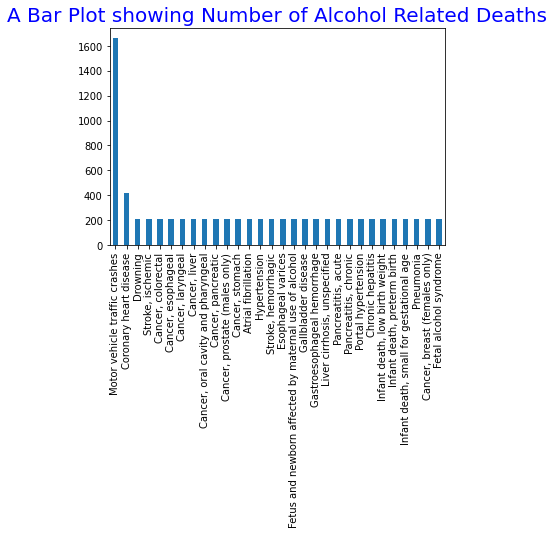

In [266]:
# Univariate plot for Cause_of_Death_ID 
# https://www.kaggle.com/code/residentmario/univariate-plotting-with-pandas
df['Cause_of_Death'].value_counts().head(30).plot.bar()
# plt.title("A Plot showing Number of Alcohol Related Deaths")
plt.title(label="A Bar Plot showing Number of Alcohol Related Deaths",
          fontsize=20,
          color="blue")

In [290]:
X_train_processed.dtypes

ConditionType                                  int64
ConsumptionPattern                             int64
AgeGroup                                       int64
Associated_AAD_YPLL_Years _2015-2019         float64
Category_100% Alcohol-Attributable           float64
Category_Alcohol-Related Poisonings          float64
Category_Cancer                              float64
Category_Coronary heart disease              float64
Category_Heart Disease and Stroke            float64
Category_Liver, Gallbladder, and Pancreas    float64
Category_Motor Vehicle Traffic Crashes       float64
Category_Other Acute Causes                  float64
Category_Other Chronic Causes                float64
Category_Suicide                             float64
Sex_Female                                   float64
Sex_Male                                     float64
dtype: object

In [295]:
X_train_processed

,ConditionType,ConsumptionPattern,AgeGroup,Associated_AAD_YPLL_Years _2015-2019,Category_100% Alcohol-Attributable,Category_Alcohol-Related Poisonings,Category_Cancer,Category_Coronary heart disease,Category_Heart Disease and Stroke,"Category_Liver, Gallbladder, and Pancreas",Category_Motor Vehicle Traffic Crashes,Category_Other Acute Causes,Category_Other Chronic Causes,Category_Suicide,Sex_Female,Sex_Male
0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
207,1,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
208,1,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
209,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [303]:
X_train_processed.dtypes

ConditionType                                  int64
ConsumptionPattern                             int64
AgeGroup                                       int64
Associated_AAD_YPLL_Years _2015-2019         float64
Category_100% Alcohol-Attributable           float64
Category_Alcohol-Related Poisonings          float64
Category_Cancer                              float64
Category_Coronary heart disease              float64
Category_Heart Disease and Stroke            float64
Category_Liver, Gallbladder, and Pancreas    float64
Category_Motor Vehicle Traffic Crashes       float64
Category_Other Acute Causes                  float64
Category_Other Chronic Causes                float64
Category_Suicide                             float64
Sex_Female                                   float64
Sex_Male                                     float64
dtype: object

[Text(0.5, 1.0, 'Relationship between Cause of Death and Alcohol Related Poisoning')]

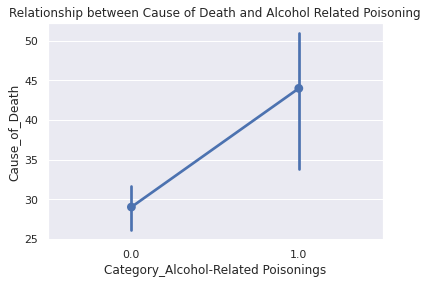

In [363]:

sns.pointplot(data=X_train_processed, x="Category_Alcohol-Related Poisonings", y=y_train).set(title='Relationship between Cause of Death and Alcohol Related Poisoning')


Deductions from the Graph.

Their is a direct / linear relationship between Alchohol related poisonings and the actual cause of death among the people.In otherwords, as Alchohol related poisonings increase , so do the number of deaths

In [356]:
X_train.dtypes

Associated_AAD_YPLL_Years     object
ConditionType                  int64
Category                      object
ConsumptionPattern             int64
Sex                           object
AgeGroup                       int64
dtype: object

Deductions from the Bar Graph.

1. There major cause of Alcohol Related Death are Traffic Accidents at a value of around 1650 for the period of 2015-2019 	

2. The Second major Cause of Alcohol Attributable death is Coronary Heart Disease at a value of around 400 for the period of 2015-2019 	

3. The Rest of Causes of Alcohol Related Deaths are generally average at around 200 deaths for the period of 2015-2019 	

[Text(0.5, 1.0, 'Perctenages of Category of Alcohol Related Deaths')]

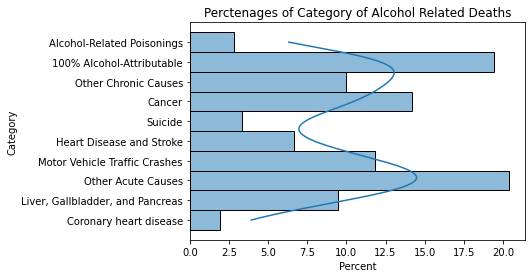

In [220]:
# Plot outputs
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y=X_train['Category'], stat="percent",kde=True).set(title='Perctenages of Category of Alcohol Related Deaths')


Deductions from the Graph

1. There are 10 categories of Alcohol related death in this use case

2. The categories with the highest percentage of Alcohol related deaths are Other Acute Causes with around 20% and 100% Alcohol Attributable Causes with around 19% of all deaths.

3. Motor Vehicle Traffic Crashes and Other Chronic causes are average causes alcohol related deaths. Liver , Gallbladder and Pancreas too join are slightly average (10 to 11%) as alcohol related death causers.

4. Alcohol-Related Poisonings, Suicide, and Coronary Heart Disease are the least causes of Alcohol Attributable Deaths,with percentages of roughly 2.5%, 3.0% and 1.7% respectively

In [230]:
#  Update your project readme and describe your final model,
#  your final model evaluation metrics, and explain whether 
#  or not your model would be useful in production and if so, how it should be used.

# train_r2 = r2_score(y_train, y_regpred_train)
# test_r2 = r2_score(y_test, y_regpred_test)

train_ME = mean_absolute_error(y_train, y_regpred_train)
test_ME = mean_absolute_error(y_test, y_regpred_test)

# Mean squared Error


train_MSE = mean_squared_error(y_train, y_regpred_train)
test_MSE = mean_squared_error(y_test, y_regpred_test)

print('Mean Absolute Error on Training Set', train_ME)
print('Mean Absolute Error on Test Set', test_ME,)
print('\n')
print('Mean Squared Error on Training Set', train_MSE)
print('Mean Squared Error on Test Set', test_MSE,)
print('\n')
print(f'Therefore the score on Training set is: {train_r2*100} % and {test_r2*100} % on Test the set')

# From our metrics Both Mean Absolute Errors and Mean Squared Errors are not Proportionally 
# large when the model is use to predict on our training and test sets, there it's performance is sligtly above average

# Looking at our R2 scoreson both Train and Test sets is 59.6% and 49.6% , is slightly average.
# Therefore our Line Regression model comes out as the best, though it has an average and not a near to execellent performance

# CONCLUSION, Looking at our choice of models, Line, Bagging and Tree Regressors, 
# Line Regression comes out as the Best for deployment to prodcution because or minimun errors and an average R2 Score
# There could ofcourse be better options than these, basing on other factors like hyperparameter tuning.


Mean Absolute Error on Training Set 7.166527067567773
Mean Absolute Error on Test Set 7.957065027392837


Mean Squared Error on Training Set 108.43666708407845
Mean Squared Error on Test Set 136.50141195257936


Therefore the score on Training set is: 59.65292018108927 % and 49.63742195711854 % on Test the set
